<a href="https://colab.research.google.com/github/christy101git/APPLICATION-PROBLEMS/blob/main/Application_Challenge_Damped_oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Challenge 1: A Damped Oscillator
**Your Task:** Analyze a signal representing a damped sine wave, which is characteristic of many mechanical and electrical systems that oscillate but lose energy over time (e.g., a mass on a spring with friction, or an RLC circuit). The function is given by: $f(t)=e^{-at}\sin(\omega t)$
. Use the following parameters: $a = 0.5$ (Damping factor), $\omega_0 =5$ rad/s (Natural oscillation frequency). Follow the full algorithm to produce the time-domain plot and the full Bode plot (magnitude and phase).

# Solution to the Application Challenge


Function: f(t) = exp(-0.5*t)*sin(5*t)
Laplace Transform: F(s) = 5/((s + 0.5)**2 + 25)
Frequency Response: F(jω) = 5/((1.0*I*w + 0.5)**2 + 25)


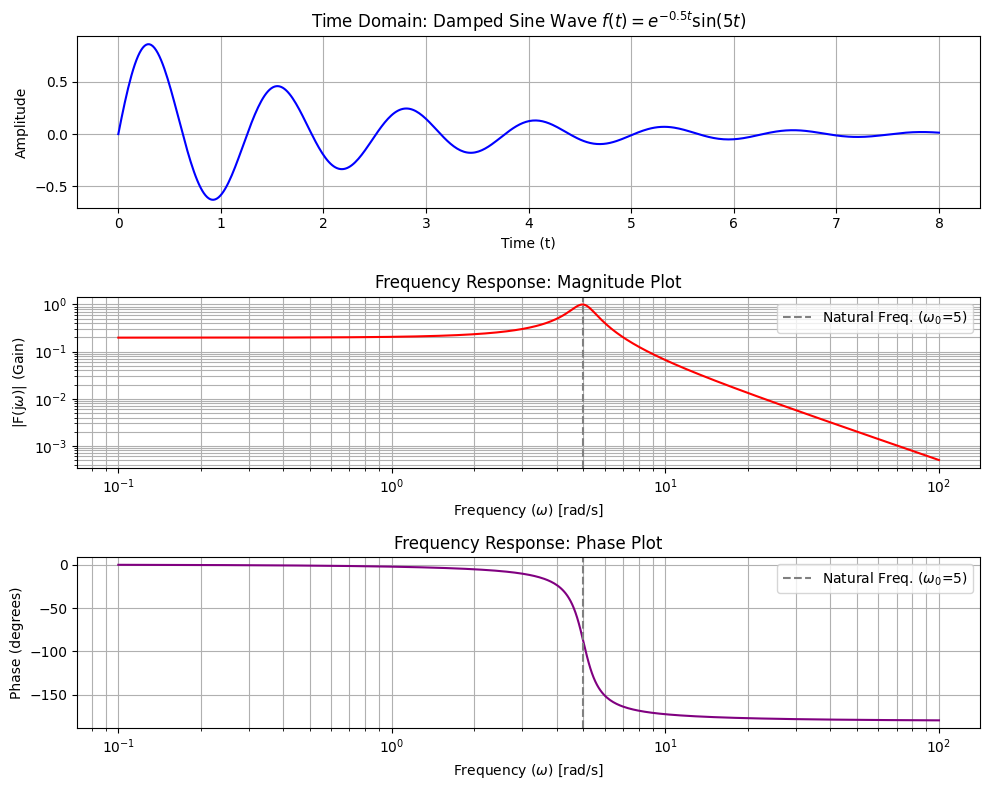

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# --- Define symbols and parameters ---
t, s, w = sp.symbols('t s w', real=True, positive=True)
a = sp.Symbol('a', real=True, positive=True)
w0 = sp.Symbol('w0', real=True, positive=True)

# --- Define the function ---
f_damped = sp.exp(-a*t) * sp.sin(w0*t)

# --- Compute its Laplace Transform using the frequency shift theorem ---
# The transform of e^(-at)f(t) is F(s+a)
F_s_damped = sp.laplace_transform(sp.sin(w0*t), t, s)[0].subs(s, s + a)

# --- Set parameters for our specific case ---
params = {a: 0.5, w0: 5}
f_case_damped = f_damped.subs(params)
F_s_case_damped = F_s_damped.subs(params)

# --- Derive Frequency Response ---
F_jw_damped = F_s_case_damped.subs(s, 1j * w)

# --- Print the symbolic results ---
print(f"Function: f(t) = {f_case_damped}")
print(f"Laplace Transform: F(s) = {sp.simplify(F_s_case_damped)}")
print(f"Frequency Response: F(jω) = {F_jw_damped}")

# --- Lambdify for numerical evaluation ---
f_damped_func = sp.lambdify(t, f_case_damped, 'numpy')
F_jw_damped_func = sp.lambdify(w, F_jw_damped, 'numpy')

# --- Generate Data ---
t_values = np.linspace(0, 8, 500)
f_values = f_damped_func(t_values)

w_values = np.logspace(-1, 2, 500)
F_jw_values = F_jw_damped_func(w_values)
magnitude = np.abs(F_jw_values)
phase = np.angle(F_jw_values, deg=True)

# --- Plotting (with raw strings for all labels) ---
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t_values, f_values, color='blue')
plt.title(r'Time Domain: Damped Sine Wave $f(t) = e^{-0.5t} \sin(5t)$')
plt.xlabel(r'Time (t)')
plt.ylabel(r'Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.loglog(w_values, magnitude, color='red')
plt.title(r'Frequency Response: Magnitude Plot')
plt.axvline(x=5, color='gray', linestyle='--', label=r'Natural Freq. ($\omega_{0}$=5)')
plt.xlabel(r'Frequency ($\omega$) [rad/s]')
plt.ylabel(r'|F(j$\omega$)| (Gain)')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.subplot(3, 1, 3)
plt.semilogx(w_values, phase, color='purple')
plt.title(r'Frequency Response: Phase Plot')
plt.axvline(x=5, color='gray', linestyle='--', label=r'Natural Freq. ($\omega_{0}$=5)')
plt.xlabel(r'Frequency ($\omega$) [rad/s]')
plt.ylabel(r'Phase (degrees)')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

# Discussion of Challenge Solution

- Time Domain: The signal is a sine wave whose amplitude decays exponentially over time, which is exactly what we expect from the function.

- Magnitude Plot: This plot shows a clear resonant peak. The gain is highest for input frequencies very close to the system’s natural oscillation frequency,$\omega_0=5$ rad/s. This means if you “excite” this system with a frequency of 5 rad/s, it will respond with the largest amplitude. This phenomenon is critical in understanding both mechanical resonance (e.g., why soldiers break step on bridges) and electrical resonance (e.g., tuning a radio).

- Phase Plot: The phase experiences a very rapid shift of 180 degrees around the resonant frequency. It starts at 0 degrees (for very low frequencies), drops sharply to -180 degrees through the resonance point, indicating a complete inversion of the signal’s phase. This sharp phase change is a key indicator of resonance in a system.

# Result

By focusing on magnitude and phase, this experiment provides us with a much deeper and more practical understanding of the Laplace transform’s role in engineering.